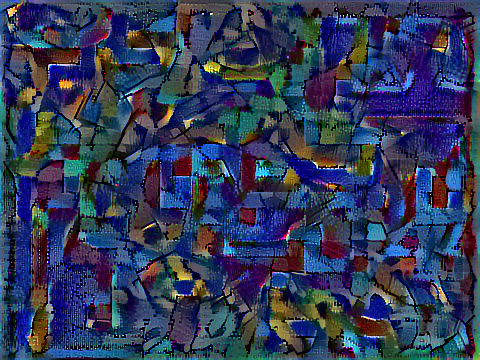

Train Step: 50
Total Time: 5.0


In [1]:
# %load video.py
from StyleTransfer import *
import cv2

video_path = "fps5.mp4"
style_path = "blue-and-red-abstract-painting-1799912.jpg"
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
writer = cv2.VideoWriter("fps5_output.avi", cv2.VideoWriter_fourcc(*'DIVX'), fps, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

model = None
previous_img = None

count = 0

while(cap.isOpened()):
    count += 1
    ret, frame = cap.read()
    if ret == True:
        print("Frames {0} / {1}".format(count, total_frames))
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        tf.keras.backend.clear_session()
        if model is None:
            model = StyleTransfer(frame, style_path, style_layers=["block1_conv1", "block3_conv1", "block5_conv1"], video=True)
        else:
            model.update_content(frame, video=True)
        opt = tf.optimizers.Adam(learning_rate=0.08, beta_1=0.8, epsilon=1e-1)
        model.transfer(opt, epochs=1, step_per_epoch=50, style_weight=1e1, content_weight=1e4, denoise_weight=1e4, previous_img=previous_img, previous_weight=1e4)
        previous_img = model.img
        newframe = model.get_frame(model.img)
        newframe = cv2.cvtColor(newframe, cv2.COLOR_RGB2BGR)
        writer.write(newframe)
    else:
        break

cap.release()
writer.release()